# Eric Schmidt

## Assignment 8

### DATA 612: Data Mining

### Dr. AbdelRahman

I chose the `House Prices - Advanced Regression Techniques` from www.kaggle.com to work with for my final project. The goal of this project is to predict the price of a house based on several predictor variables. As with all data science projects, it's best to have some domain knowledge for best results. Although I am not a real estate expert, I am familiar with the nuances that affect housing prices as a consumer in the United States real estate market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/test.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Prior to any preprocessing, I'd like to get a baseline score for a Linear Regression model and Random Forest Regression model.

The first step is to split the training data into a 2D array of features, `X_train`, and a 1D array of targets, `y_train`.

Next, I decided to use One-Hot-Encoding via `get_dummies()` method followed by standardizing the data.

In [4]:
from sklearn.preprocessing import StandardScaler

full_df = pd.concat([train.iloc[:, 1:-1], test.iloc[:, 1:]])
full_df = full_df.fillna(0, axis = 1)
full_df = pd.get_dummies(full_df)

scaler = StandardScaler()
full_df = scaler.fit_transform(full_df)

full_df.shape

(2919, 311)

In [5]:
X_train = full_df[:1460, :]
y_train = train.iloc[:, -1]
X_test = full_df[1460:, :]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

lr = LinearRegression().fit(X_train, y_train)
lr_y_pred = lr.predict(X_train)

np.sqrt(mean_squared_log_error(y_train, lr_y_pred))
# lr.score(X_train, y_train)

0.11119204322622489

The multiple regression model without extensive preprocessing yielded an RMSLE score of 0.1112

Next, lets apply the same dataset to a Random Forest Regressor model.

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 123)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_train)

np.sqrt(mean_squared_log_error(y_train, rf_y_pred))
# rf.score(X_train, y_train)

0.05806291180054237

Our RMSLE decreased to 0.0581

#### Sale Price by Neighborhood

Now that we have baseline data, I'd like to explore relationships that affect Sale Price based on my domain knowledge of real estate. The first predictor I believe makes the most impact is the Neighborhood where the house is located. I'd like to see if there's a relationship between the `Neighborhood` and the `SalePrice`.

In [8]:
train.assign(index = train.groupby('Neighborhood').cumcount()).pivot('index', 'Neighborhood', 'SalePrice').head(5)

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
index,,,,,,,,,,,,,,,,,,,,,
0,167240.0,151000.0,112000.0,118000.0,225000.0,208500.0,140000.0,82000.0,177000.0,139400.0,...,250000.0,345000.0,129900.0,179500.0,129500.0,159000.0,307000.0,438780.0,170000.0,181500.0
1,192500.0,124000.0,106000.0,132000.0,180000.0,223500.0,163500.0,94750.0,185000.0,40000.0,...,260000.0,325300.0,113000.0,135900.0,144000.0,144000.0,249700.0,239000.0,220000.0,385000.0
2,192000.0,NaN,94500.0,68500.0,235000.0,279500.0,217000.0,83000.0,168500.0,110000.0,...,290000.0,256300.0,140000.0,140000.0,90000.0,158000.0,172500.0,501837.0,269500.0,162500.0
3,172500.0,NaN,89500.0,114500.0,190000.0,230000.0,259500.0,136900.0,174000.0,101000.0,...,403000.0,306000.0,80000.0,127000.0,154000.0,178000.0,245000.0,286000.0,228000.0,324000.0
4,178740.0,NaN,118000.0,127000.0,211000.0,179900.0,200100.0,155000.0,185000.0,85000.0,...,290000.0,277500.0,107400.0,115000.0,149350.0,118964.0,164500.0,377426.0,184000.0,245500.0


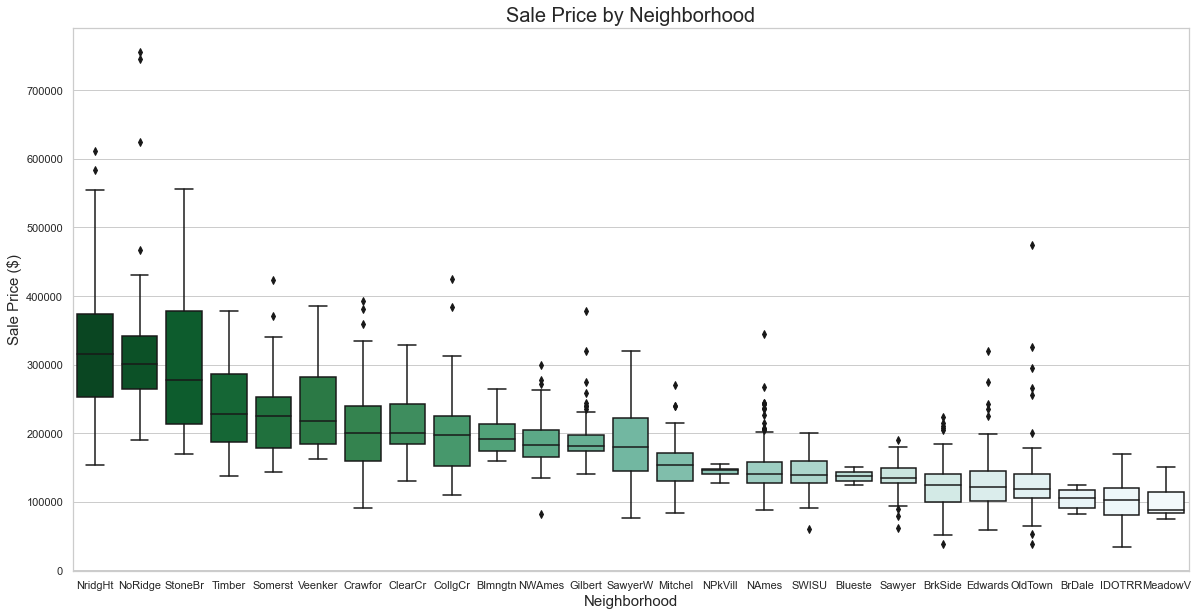

In [9]:
# Create 'wide-data' format to plot by neighborhood.
neighborhood_df = train.assign(index = train.groupby('Neighborhood').cumcount()).pivot('index',
                                                                                       'Neighborhood',
                                                                                       'SalePrice')
# Create new index sorting by median price for easier visualization.
sorted_index = neighborhood_df.median().sort_values(ascending = False).index
neighborhood_df_sorted = neighborhood_df[sorted_index]

# Create boxplot() to show range of sale prices by neighborhood.
sns.set(rc = {"figure.figsize": (20, 10)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = neighborhood_df_sorted, palette = "BuGn_r")
ax.set_ylabel("Sale Price ($)", fontsize = 15)
ax.set_xlabel("Neighborhood", fontsize = 15)
ax.set_title("Sale Price by Neighborhood", fontsize = 20)
plt.show()

The boxplot confirms there is a relationship between the `Neighborhood` and the `SalePrice`. There are some neighborhoods that have a larger distribution than others, but this should be a reliable predictor in home sale price.

Next, let's assign the mean neighborhood `SalePrice` to each row based on the respective `Neighborhood`. Using a dictionary should accomplish this.

In [10]:
neighborhood_mean = train.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending = False).to_dict()
train['mean_Neighborhood'] = train['Neighborhood'].map(neighborhood_mean)
test['mean_Neighborhood'] = test['Neighborhood'].map(neighborhood_mean)

First, let's explore the correlation between `SalePrice` and all **numeric** features.

In [11]:
train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
OverallQual          0.790982
mean_Neighborhood    0.738630
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
TotalBsmtSF          0.613581
1stFlrSF             0.605852
FullBath             0.560664
TotRmsAbvGrd         0.533723
YearBuilt            0.522897
YearRemodAdd         0.507101
GarageYrBlt          0.486362
MasVnrArea           0.477493
Fireplaces           0.466929
BsmtFinSF1           0.386420
LotFrontage          0.351799
WoodDeckSF           0.324413
2ndFlrSF             0.319334
OpenPorchSF          0.315856
HalfBath             0.284108
LotArea              0.263843
BsmtFullBath         0.227122
BsmtUnfSF            0.214479
BedroomAbvGr         0.168213
ScreenPorch          0.111447
PoolArea             0.092404
MoSold               0.046432
3SsnPorch            0.044584
BsmtFinSF2          -0.011378
BsmtHalfBath        -0.016844
MiscVal             -0.021190
Id                  -0.021917
LowQualFin

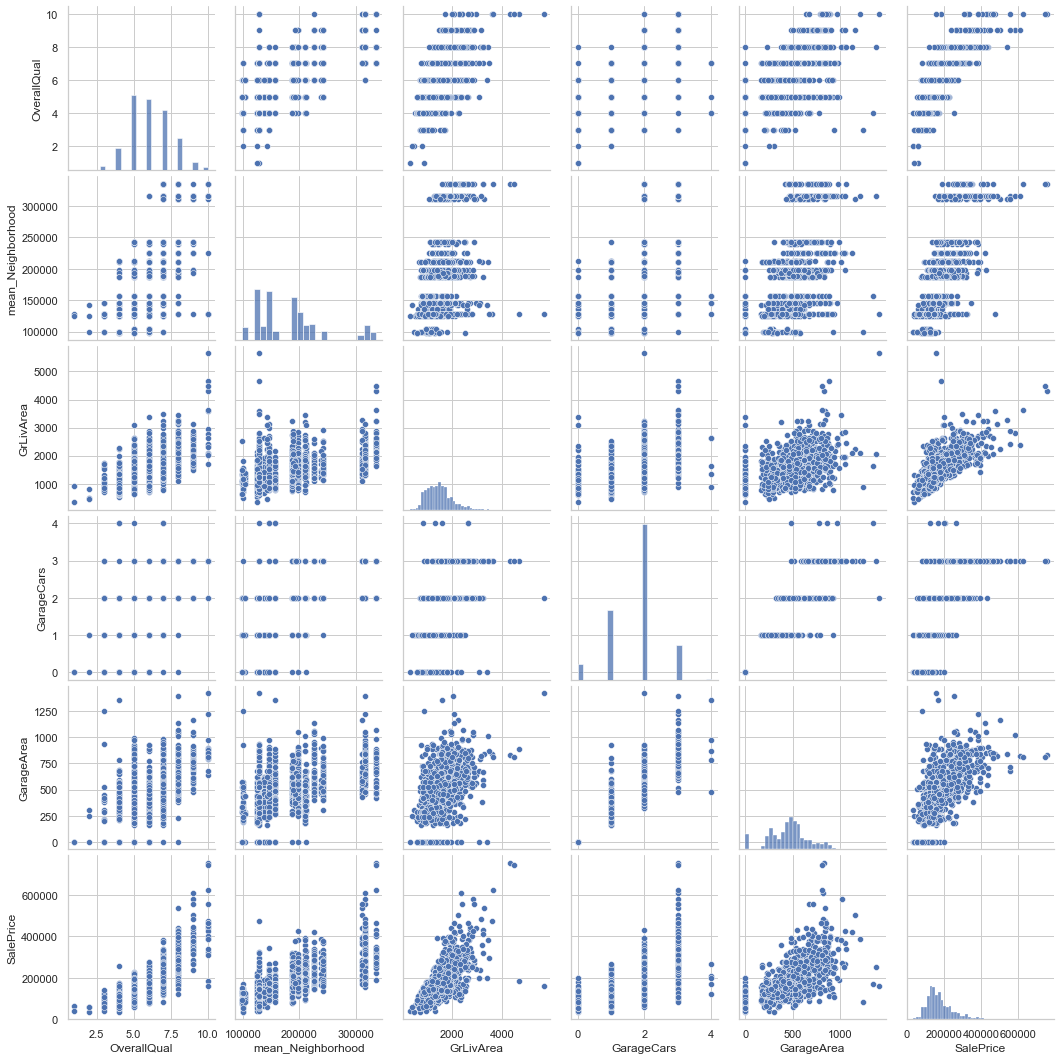

In [12]:
ax = sns.pairplot(train.loc[:, ['OverallQual', 'mean_Neighborhood', 'GrLivArea',
                                'GarageCars', 'GarageArea', 'SalePrice']])
plt.show()

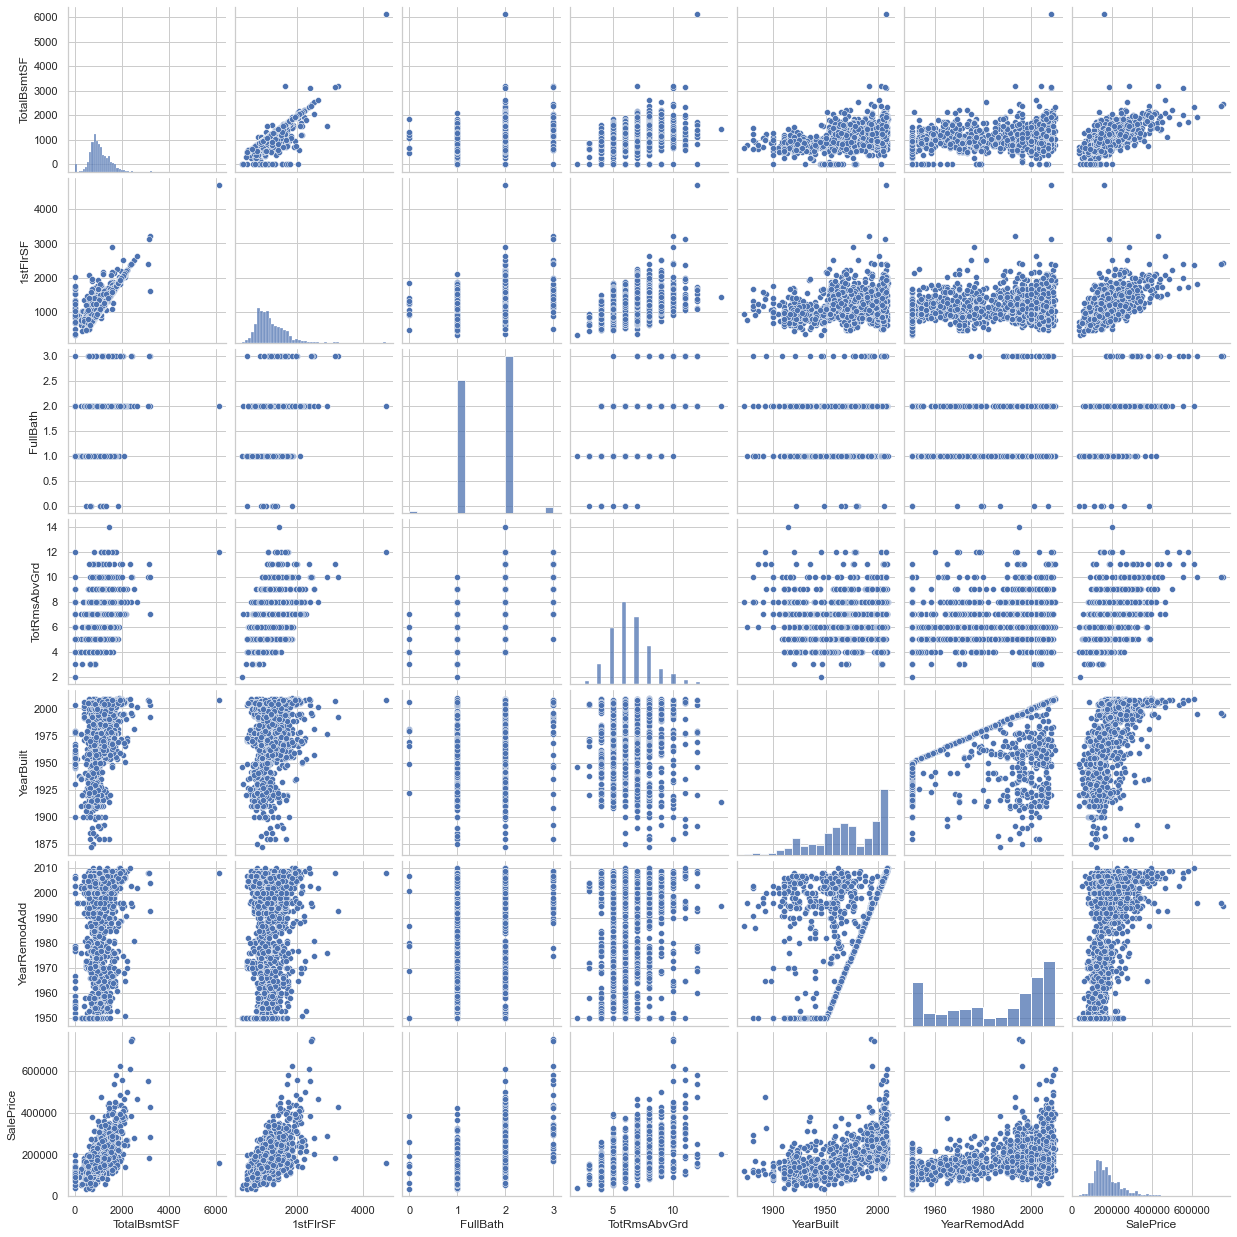

In [13]:
ax = sns.pairplot(train.loc[:, ['TotalBsmtSF', '1stFlrSF', 'FullBath',
                                'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','SalePrice']])
plt.show()

Analysis of strong numeric correlation features with `SalePrice` shows `OverallQual`, `mean_Neighborhood`, `GarageCars`, `TotalBsmtSF`, `1stFlrSF`, and `FullBath` as major features that independently affect `SalePrice`.

These numeric features will be included in the models.

Our next step should be to encode any non-numeric values as numeric representations for analysis. Using Pandas `get_dummies` method allows us to One-Hot-Encode features identified to be relevant.

In [14]:
num_cols = ['OverallQual', 'mean_Neighborhood', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

train_num = train[num_cols]
test_num = test[num_cols]

cat_cols = ['SaleCondition', 'SaleType', 'Functional']

train_cat = pd.get_dummies(train[cat_cols])
test_cat = pd.get_dummies(test[cat_cols])

X_train = pd.concat([train_num, train_cat], axis = 1)
y_train = train['SalePrice']
X_test = pd.concat([test_num, test_cat], axis = 1)

Print shape of each data set to confirm expected row and column count.

In [15]:
print(X_train.shape, y_train.shape, X_test.shape)

(1460, 28) (1460,) (1459, 28)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lr_modified = LinearRegression().fit(X_train, y_train)
lr_modified_y_pred = lr_modified.predict(X_train)
lr_pred_df = pd.DataFrame({'y_pred': lr_modified_y_pred})
lr_pred_df.loc[(lr_pred_df['y_pred'] < 0)] = 0
lr_modified_y_pred = lr_pred_df.to_numpy()

np.sqrt(mean_squared_log_error(y_train, lr_modified_y_pred))

0.4461721528550762

Our multiple regression model acheived an RMSLE score of 0.4460, much higher than on the original dataset.

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_modified = RandomForestRegressor(random_state = 123)
rf_modified.fit(X_train, y_train)
rf_modified_y_pred = rf_modified.predict(X_train)

np.sqrt(mean_squared_log_error(y_train, rf_modified_y_pred))

0.06949958237440367

Our Random Forest Regressor model achieved a RMSLE score of 0.0695, similar to that of our original dataset but did not improve the model.

## Conclusion

Unfortunately, our data preprocessing efforts did not yeild the lowest RMSLE score when compared to utilizing the entire data set. With a couple simple preprocessing procedures, such as using One-Hot-Encoding and filling all NaN values with '0', we were able to achive an RMSLE of 0.0581 with a Random Forest Regressor.

Next, we will apply this model to the test dataset and submit to Kaggle.

In [18]:
train = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/test.csv')

df_id = pd.concat([train.iloc[:, 0], test.iloc[:, 0]])
full_df = pd.concat([train.iloc[:, 1:-1], test.iloc[:, 1:]])
full_df = full_df.fillna(0, axis = 1)
full_df = pd.get_dummies(full_df)

scaler = StandardScaler()
full_df = scaler.fit_transform(full_df)

X_train = full_df[:1460, :]
y_train = train.iloc[:, -1]
X_test = full_df[1460:, :]

test_pred = rf.predict(X_test)
test_pred

array([128556.08, 154555.4 , 179231.25, ..., 159698.05, 112920.5 ,
       224175.96])

This model achieved an RMSLE score of 0.14493.

In [19]:
pred_df = pd.DataFrame(test_pred, columns = ['SalePrice'])
pred_df = pd.concat([df_id.iloc[1460:], pred_df], axis = 1)
pred_df

,Id,SalePrice
0,1461,128556.08
1,1462,154555.40
2,1463,179231.25
3,1464,179579.50
4,1465,200024.86
...,...,...
1454,2915,85454.76
1455,2916,86577.11
1456,2917,159698.05
1457,2918,112920.50


In [20]:
pred_df.to_csv(r"C:\Users\erics\OneDrive\Documents\Data Analytics\6_DATA 612 [Data Mining]\Final Project\submission.csv",
              index = False)

<img src = "https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/Competition%20Submission.png">

<img src = "https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/Leaderboard.png">